# Coding Homework 9: [put your name here]

Go through this notebook, following the instructions! (Remember to not delete or create any cells)

> TAs will mark this assignment by checking ***MarkUs*** autotests and by manually grading Q______.


We begin by importing dataset and the libraries we will use.

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree, model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz as gv
happiness2017 = pd.read_csv("happiness2017.csv")

# Gallup Report Happiness Survey
Using data from the Gallup World Poll (and the World Happiness Report), we are interested in predicting which factors influence life expectancy around the world. These data are in the file happinessdata_2017.csv, which we imported as `happiness2017`.

### Q1: Add a new column to `happiness2017` called `life_exp_good` which is `True` for countries with life expectancy higher than 65 years, and `False` otherwise.

In [ ]:
# Q1: your answer will be tested!


In [4]:
# SCOTT
happiness2017.head()
happiness2017['life_exp_good'] = happiness2017.life_exp > 65

In [26]:
# test_Q1
assert sum(happiness2017.life_exp_good == True) == 573, "Use .head() to see the existing columns and then use a boolean condition to define your new column."

Now divide create a new dataframe `happiness2017_cleaned` from `happiness2017` that contains the following columns `life_exp_good`, `logGDP`, `social_support`, `freedom`, and `generosity`, with all rows with `NaN` entries dropped. Then create an 80/20 split (80% training set and 20% testing set) for the `happiness2017_cleaned` data.

- To do this in a reproducible way, we're going to set a "random seed"; and, in preparation for this, let's take a moment to motivate our choice of $1985$ for the "random seed".

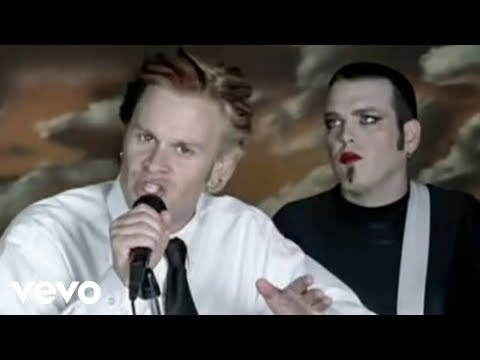

In [8]:
from IPython.display import YouTubeVideo
# 19, 19, 1985!
YouTubeVideo('K38xNqZvBJI', width=800, height=500)
# Remember, always choose your favorite number for your "random seeds"
# The specific number you choose doesn't even really matter, which is why 
# it's so important to make a big deal about it!

In [ ]:
np.random.seed(1985) # do NOT change this line: it sets the "random number generation seed"
# which makes the "pseudorandomness" gererated in the code the same every time and this
# makes the code reproducibile which ensures that our testing code works properly every time
happiness2017_cleaned = None
train, test = None

In [5]:
# SCOTT
np.random.seed(1985)
happiness2017_cleaned = happiness2017[['life_exp_good', 'logGDP', 
                                       'social_support', 'freedom', 'generosity']].dropna()
train, test = model_selection.train_test_split(happiness2017_cleaned, train_size=0.80)

### Q2: Train a classification tree `clf` using only the  `social_support` variable to predict if a country has good life expectancy

#### Use default values for all (tuning) parameters instantiating the Decision Tree Classifier.

> Hint: should you use the `train` data, or the `test` data, or all this data combined to fit the classification tree?

In [27]:
# Q2: your answer will be tested!
np.random.seed(1985) #Do not change this line
clf = None

In [6]:
# SCOTT
clf = tree.DecisionTreeClassifier().fit(train[['social_support']],train.iloc[:,:1])

In [ ]:
testdata = test[["life_exp_good", "social_support"]].dropna()
Xt = testdata.iloc[:,1:]
Yt = testdata.life_exp_good

In [29]:
# test_Q2
assert sum(Yt == clf.predict(Xt)) == 170, "Make sure to train on just the training dataset."

Now you can visualize your tree!

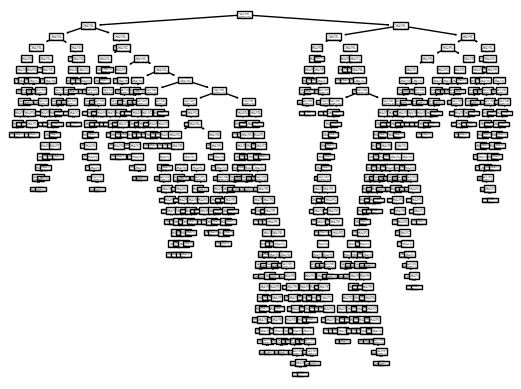

In [30]:
_ = tree.plot_tree(clf)

Or to make it look prettier we can use graphviz.

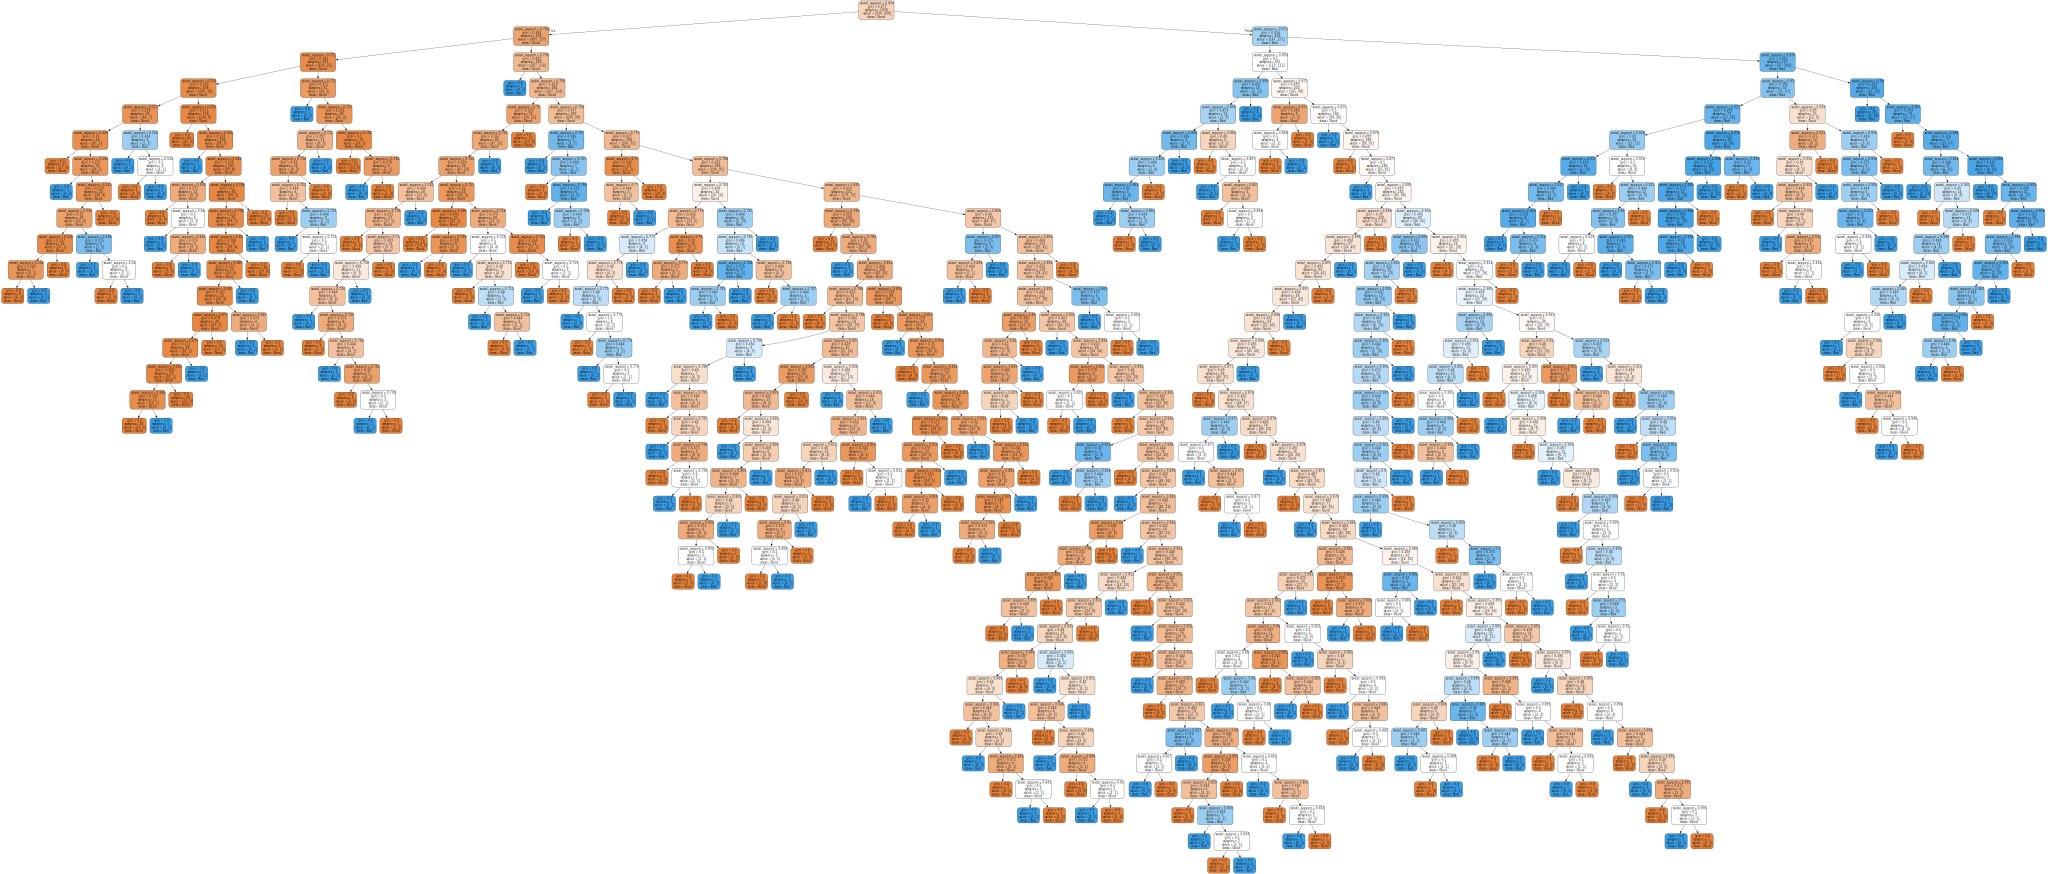

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=["social_support"],
                                class_names=["Good", "Bad"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data)
graph

And to make it legible we can add the max_depth parameter to our call of export_graphviz.

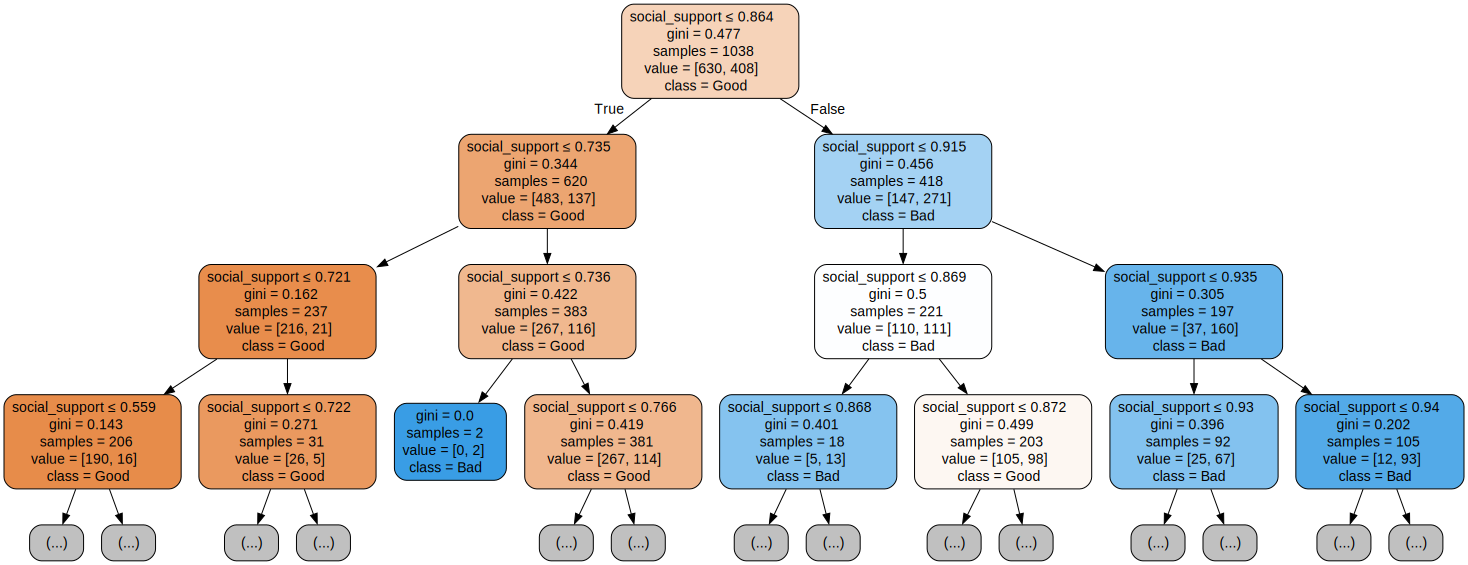

In [43]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3,
                                feature_names=["social_support"],
                                class_names=["Good", "Bad"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data)
graph

### Q3: How many observation are in the training data set and the test data set?

(260, 5)

In [ ]:
# Q3: your answer will be tested!
num_train = None # Replace this with the number of observations in the training set
num_test = None # Replace this with the number of observations in the test set
Q3 = (num_train, num_test) # Do not change this line

In [ ]:
# test_Q3
assert Q3 == (1038,260), "Use google if you need help figuring out how to use `clf.predict()`"

### Q4: Why did you fit the classification tree with the data set you did?

#### Write a one to two sentence answer to this question in markdown cell below
- Compare your response to the answer given in the ***MarkUs*** output

> Answer here...


In [11]:
# test_Q4
assert False, "The training data set was used in order to save some test data which allows us to see how the model predicts on new data that it hasn't seen before and hasn't used to fit itself.  If we see how a model performs using data that it has had the chance to see and learn (and even potentially sort of memorize?) then we'll have a false sense of confidence in the capabilites of the model."

AssertionError: The training data set was used in order to save some test data which allows us to see how the model predicts on new data that it hasn't seen before and hasn't used to fit itself.  If we see how a model performs using data that it has had the chance to see and learn (and even potentially sort of memorize?) then we'll have a false sense of confidence in the capabilites of the model.

### Q5: Comment on the complexity of the decision tree classification model visualized above, especially in light of the fact that only a single feature was used to predict the outcome in this model.


#### Write a one to two sentence answer to this question in markdown cell below
- Compare your response to the answer given in the ***MarkUs*** output

> Answer here...


In [12]:
# test_Q5
assert False, "This decision tree seems like a really complex model with all sorts of branches as rules for making the prediction of good life expetancy based on just the single `social_support` variable. Since the `social_support` variable is a continuous numerical value, this means that predictions are being made based on very specific interval ranges of the values of this variable, which is highly suggestive of a very particular and specific model that could be at risk of overfitting to the specific idiosynchrosies of the given data set.  The training data set include 1038 observations; so, perhaps this might be enough to justify the complexity of the constructed decision tree; but, the way we could see if this was the case would be by seeing how the fitted decision tree performs on new data. I.e., can it generalize to new data that wasn't used in its construction? That would be very telling about how overfit it was to the idiosynchrosies of the data set used to fit it."

AssertionError: This decision tree seems like a really complex model with all sorts of branches as rules for making the prediction of good life expetancy based on just the single `social_support` variable. Since the `social_support` variable is a continuous numerical value, this means that predictions are being made based on very specific interval ranges of the values of this variable, which is highly suggestive of a very particular and specific model that could be at risk of overfitting to the specific idiosynchrosies of the given data set.  The training data set include 1038 observations; so, perhaps this might be enough to justify the complexity of the constructed decision tree; but, the way we could see if this was the case would be by seeing how the fitted decision tree performs on new data. I.e., can it generalize to new data that wasn't used in its construction? That would be very telling about how overfit it was to the idiosynchrosies of the data set used to fit it.

### Q6: Use the `clf.predict()` method to answer the following questions and confirm your answer using the `graphviz` visualization of the decision tree
a) Does your decision tree predict that a country with `social_support = .49` has good life expectancy?  
b) what if `social_support = .5`  
c) what if `social_support = .51`  
d) what if `social_support = .9`  

In [ ]:
# Q6: your answer will be tested!
Q6a = None # Replace this with True or False: don't supply something like array([False])
Q6b = None
Q6c = None
Q6d = None
Q6 = (Q6a, Q6b, Q6c, Q6d) # Do not change this line

In [40]:
# SCOTT
clf.predict(pd.DataFrame({'social_support': [.49]})),\
clf.predict(pd.DataFrame({'social_support': [.5]})),\
clf.predict(pd.DataFrame({'social_support': [.51]})),\
clf.predict(pd.DataFrame({'social_support': [.9]}))

(array([False]), array([ True]), array([False]), array([ True]))

In [ ]:
# test_Q6
assert Q6 == (False, True, False, True), "Try google if you need help figuring out how to use `clf.predict()`"

#### Do these predictions make sense to you?

Look at how these small differences in the input rapidly change the predicted label... it seems kind of strange. It's a little hard to intuitively see why predictions should change like this... it makes you wonder if the model is really doing anything meaningful here.  

Perhaps the model might just actually be overly complex and convoluted and might be overinterpreting the data used to fit it (which we call overfitting). Since you'll probably agree that the behaviour of the model that we're observing seems a bit off, you'll probably also agree that it's a reasonable idea to try reduce the complexity of the model so it can be more reliably estimated with the data at hand.  With that in mind, create and fit a new classification tree `clf2` on the same inputs with a maximum depth of 2.

In [ ]:
np.random.seed(1985) #Do not change this line
clf2 = None


In [35]:
# SCOTT
np.random.seed(1985) #Do not change this line
clf2 = tree.DecisionTreeClassifier(max_depth=2).fit(train[['social_support']],train.iloc[:,:1])
clf2.predict(pd.DataFrame({'social_support': [.49]})),\
clf2.predict(pd.DataFrame({'social_support': [.5]})),\
clf2.predict(pd.DataFrame({'social_support': [.51]})),\
clf2.predict(pd.DataFrame({'social_support': [.9]}))

(array([False]), array([False]), array([False]), array([ True]))

### Q7: Reanswer Q6 with `clf2`.

#### Use the same train/test split data used so far.

In [46]:
# Q7: your answer will be tested!
Q7a = None # Replace this with True or False
Q7b = None
Q7c = None
Q7d = None
Q7 = (Q7a, Q7b, Q7c, Q7d) # Do not change this line

In [47]:
hint = "Use google to figure out how to use `clf.predict()`\n"
hint += "but feel free to just figure out the class labels in the decision tree\n"
hint += "visualizations and then you can just read the answers of the from plot."

In [48]:
# test_Q7
assert Q7 == (False, False, False, True), hint

AssertionError: Use google to figure out how to use `clf.predict()`
but feel free to just figure out the class labels in the decision tree
visualizations and then you can just read the answers of the from plot.

### Now train another classification tree `clf3` using `logGDP`, `social_support`, `freedom`, and `generosity` as potential predictors.

#### Use the same train/test split data used so far and use default (tuning) parameters when instantiating the model (so, e.g., don't set a maximum tree depth)

In [ ]:
np.random.seed(1985) #Do not change this line
clf3 = None


In [21]:
# SCOTT
np.random.seed(1985)
clf3 = tree.DecisionTreeClassifier().fit(train.iloc[:,1:],train.iloc[:,:1])
train

,life_exp_good,logGDP,social_support,freedom,generosity
796,True,10.268883,0.942231,0.909436,0.401817
1260,False,7.134961,0.302955,0.584088,-0.065515
199,False,7.881805,0.715519,0.927462,0.422174
974,True,9.863790,0.895720,0.811338,0.024976
543,False,8.592615,0.621467,0.809383,-0.036684
...,...,...,...,...,...
356,False,9.538721,0.894753,0.872712,-0.083152
1007,False,8.758570,0.846413,0.907458,0.016196
481,False,8.848338,0.829650,0.884005,0.043558
1172,True,10.365640,0.947864,0.738472,-0.038966


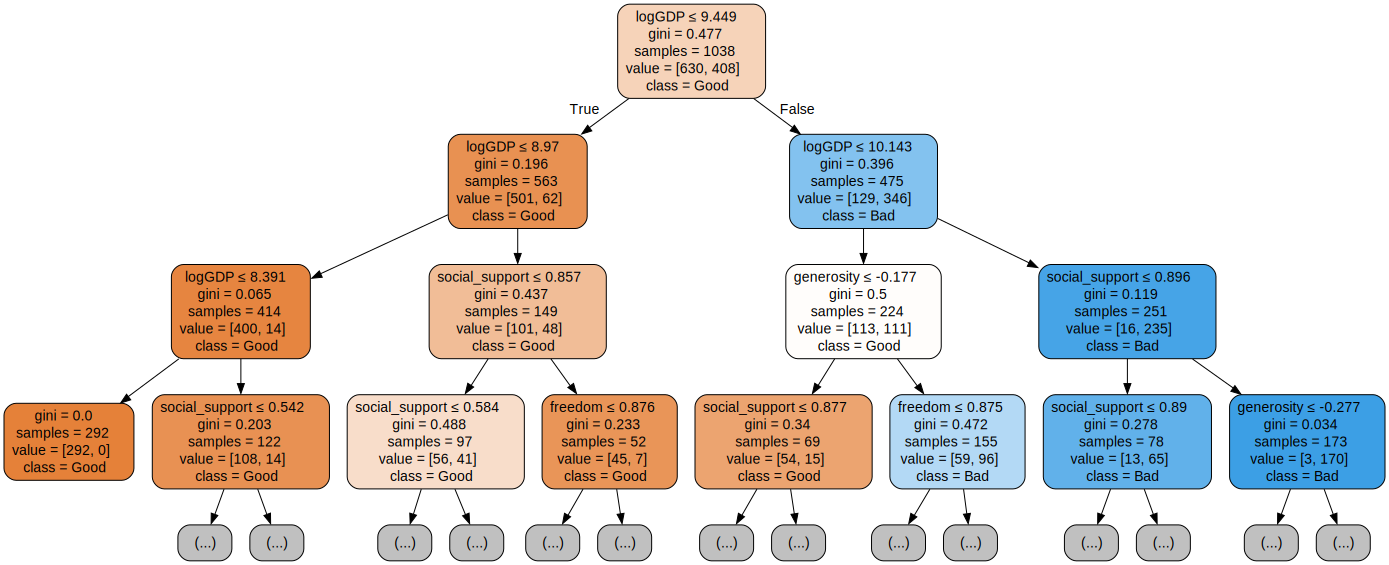

In [41]:
dot_data = tree.export_graphviz(clf3, out_file=None, max_depth= 3,
                                feature_names=["logGDP", "social_support", "freedom", "generosity"],
                                class_names=["Good", "Bad"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data)
graph

### Q8: Use the testing dataset you created in Q1 to create confusion matrices for `clf2` and `clf3`. Report the sensitivity (true positive rate), specificity (true negative rate) and accuracy for each of the trees/models.


#### Provide your answers as decimal numbers with three signifiant digits, such as `0.123` (and not as percentages like `12.3%`), and treat “Good” life expectancy as the positive response and prediction class. 

> Hint 1: Use `np.round(0.1234,3)` to produce the correct rouding for the answers  
> Hint 2: `y_true` or `y_pred` parameter go first in the `confusion_matrix` function?  
> Hint 3: Which columns/features of the `test` data set should be used for `clf2` versus `clf3`?

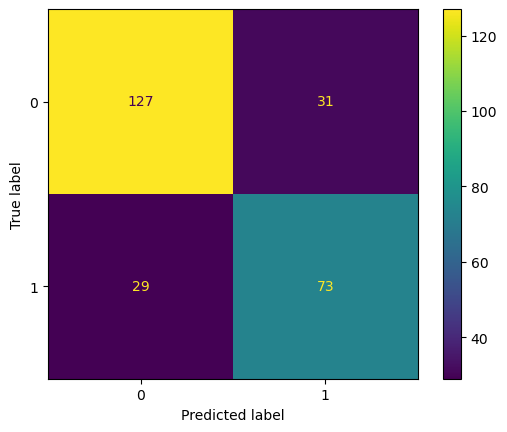

In [66]:
# SCOTT
ConfusionMatrixDisplay(confusion_matrix(test.iloc[:,:1], clf2.predict(test[['social_support']]))).plot()

In [62]:
# SCOTT
test.iloc[:,:1].sum()

life_exp_good    102
dtype: int64

In [69]:
# SCOTT
import numpy as np
np.round([73/(73+29),127/(127+31),(127+73)/(127+73+29+31)],3)

array([0.716, 0.804, 0.769])

In [77]:
# SCOTT
confusion_matrix(test.iloc[:,:1], clf3.predict(test.iloc[:,1:]))

array([[139,  19],
       [ 17,  85]])

In [78]:
# SCOTT
clf3 = tree.DecisionTreeClassifier().fit(train.iloc[:,1:],train.iloc[:,:1])
confusion_matrix(test.iloc[:,:1], clf3.predict(test.iloc[:,1:]))

array([[140,  18],
       [ 16,  86]])

In [79]:
# SCOTT
clf3 = tree.DecisionTreeClassifier().fit(train.iloc[:,1:],train.iloc[:,:1])
confusion_matrix(test.iloc[:,:1], clf3.predict(test.iloc[:,1:]))

array([[142,  16],
       [ 17,  85]])

In [76]:
# SCOTT
np.round([84/(84+18),141/(141+17),(141+84)/(141+84+17+18)],3)

array([0.824, 0.892, 0.865])

In [ ]:
# Q8: your answer will be tested!
(clf2_sensitivity, clf2_specificity, clf2_accuracy) = (None, None, None) #Replace the Nones with the corresponding answers
(clf3_sensitivity, clf3_specificity, clf3_accuracy) = (None, None, None)

In [ ]:
# test_Q8
assert (clf2_sensitivity, clf2_specificity, clf2_accuracy, clf3_sensitivity, clf3_specificity, clf3_accuracy) == \
       (0.716,             0.804,           0.769,         0.833,             0.886,             0.865), \
    "Make sure you rounded up, and didn't confuse what the rows and columns of the confusion matrix mean. ConfusionMatrixDisplay.from_predictions might help with this."

### Feature importance
As we are statisticians in this course, the extent to which we do not understand the internal workings and predictions from our decision trees depend on the predictor variables should feel a bit off-putting. To remedy this we can use heuristics to judge how relatively important the different predictor variables are. For our purposes the simplest heuristic we can use is the Gini Importance: the gini importance of a predicting variable X is defined as the number of nodes which split on X divided by the total number of splits in the tree.  You can find the gini importances from a classification tree using `.feature_importances_`.

### Q9: Which predictor variable is most important for making predictions according to clf3?

In [ ]:
# Q9: your answer will be tested!
Q9 = None # Replace this with the name of the most relevant predictor variable

In [ ]:
# test_Q9
assert Q9 == "logGDP"

### Q10: Describe the differences/similarities of interpreting coefficients in linear model regression versus feature importances in decision trees.
#### Write an approximately two sentence answer to this question in markdown cell below
- Compare your response to the answer given in the ***MarkUs*** output

Put your answer to Q10 here.

In [ ]:
# test_Q10
assert False, ""

# Confusion matrices and Metrics
DISCUSSION OF TERMS THAT SCOTT WANTED https://en.wikipedia.org/wiki/Sensitivity_and_specificity
Sensitivity/Specificity = True positive/Negative rate = Formula
False postitive / negative rate = Formula

Two classification trees were built to predict which individuals have a disease using different sets of potential predictors. We use each of these trees to predict disease status for 100 new individuals. Below are confusion matrices corresponding to these two classification trees.



| **Tree A**         | Disease | No disease | $\hspace{1in}$ | **Tree B**         | Disease | No disease |
|--------------------|---------|------------|----------------|--------------------|---------|------------|
| Predict disease    | 36      | 22         |                | Predict disease    | 24      | 6          |
| Predict no disease | 2       | 40         |                | Predict no disease | 14      | 56         |


### Q11: Calculate the accuracy, false-positive rate, and false negative rate for each classification tree.
Here, a “positive” result means we predict an individual has the disease and a “negative” result means we predict they do not.
Round each value UP to 2 decimal points.

In [ ]:
# Q11: your answer will be tested!
TreeA_accuracy = None
TreeA_false_positive_rate = None
TreeA_false_negative_rate = None

TreeB_accuracy = None
TreeB_false_positive_rate = None
TreeB_false_negative_rate = None

In [3]:
# SCOTT
# I think I got these right, from: https://en.wikipedia.org/wiki/Sensitivity_and_specificity
np.round([(36+40)/(36+40+24),1-40/42, 1-36/(36+22),(56+24)/(56+20+24),1-56/70, 1-24/(30)],3)

array([0.76 , 0.048, 0.379, 0.8  , 0.2  , 0.2  ])

In [ ]:
# test_Q11
assert (TreeA_accuracy, TreeA_false_positive, TreeA_false_negative, TreeB_accuracy, TreeB_false_positive, TreeB_false_negative) == (.76,.06,.36,.80,.37,.10), "Make sure you round correctly and calculate the FALSE positive and negative rates."

### Q12: Written followup to Q10 that scott asked for

# Geometric Interpretation of Prediction
Data was collected on 30 cancer patients to investigate the effectiveness (Yes/No) of a treatment. Two quantitative variables x1 and x2 (taking values between 0 and 1) are thought to be important predictors of effectiveness. Suppose that the rectangles labeled as nodes in the scatter plot below represent nodes of a classification tree.
![Scatter plot with a horizontal x1 axis and vertical x2 axis, both ranging from 0.00 to 1.00, and blue triangular points representing Effectiveness = 'Yes' and round orange points representing Effectiveness = 'No'. It is divided into 4 regions, labelled nodes 1-4. Node 1 is the bottom left region, node 4 the bottom right, node 3 the top left, and node 2 the top right. The top regions are divided from the bottom ones by a horizontal line along x_2=0.50. Node 2 is separated from node 3 by a line at x1=0.50. Node 2 is separated from node 3 by a line at x1=0.50. Node 1 has 5 'Yes' nodes and 7 'No' Nodes. Node 2 has 3 'Yes' nodes and 2 'No' Nodes. Node 3 has 1 'Yes' node and 3 'No' Nodes. Node 4 has 2 'Yes' nodes and 7 'No' Nodes.](HW9_Q7_Graph.png)

### Q13: The diagram above is the geometric interpretation of a classification tree to predict drug effectiveness based on two predictors, x1 and x2. What is the predicted class of each node?

In [ ]:
# Q13: your answer will be tested!
Q13_Node1 = None #Replace with 'Yes' or 'No'
Q13_Node2 = None
Q13_Node3 = None
Q13_Node4 = None

In [ ]:
# test_Q13
assert (Q13_Node1, Q13_Node2, Q13_Node3, Q13_Node4) == ('No', 'Yes', 'No', 'No'), "Hint: The classification tree will pick 'Yes' or 'No' for each region depending on which is more common in that region."

### Q14: What is the first variable that the decision tree splits on?

In [46]:
# Q14: your answer will be tested!
Q14 = None # Replace with 'x1' or 'x2'

In [ ]:
# test_Q14
assert Q14 == 'x2', "Recall the lines represent splits"